In [51]:
import os
import seaborn as sns
import PIL
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras import models, layers
import cv2

In [2]:
os.listdir(r"dataset")

['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

In [3]:
#check number of images
#join other columns too
train = []
label = []


for i in os.listdir(r"dataset"):
    #iterate through folders in train
    train_class = os.listdir(os.path.join(r"dataset", i))
        
    #iterate through the images in those folder
    for j in train_class:
        img = os.path.join(r"dataset", i,j)
        train.append(img)
        label.append(i)
        
print('Number of train images = {}'.format(len(train)))

Number of train images = 31041


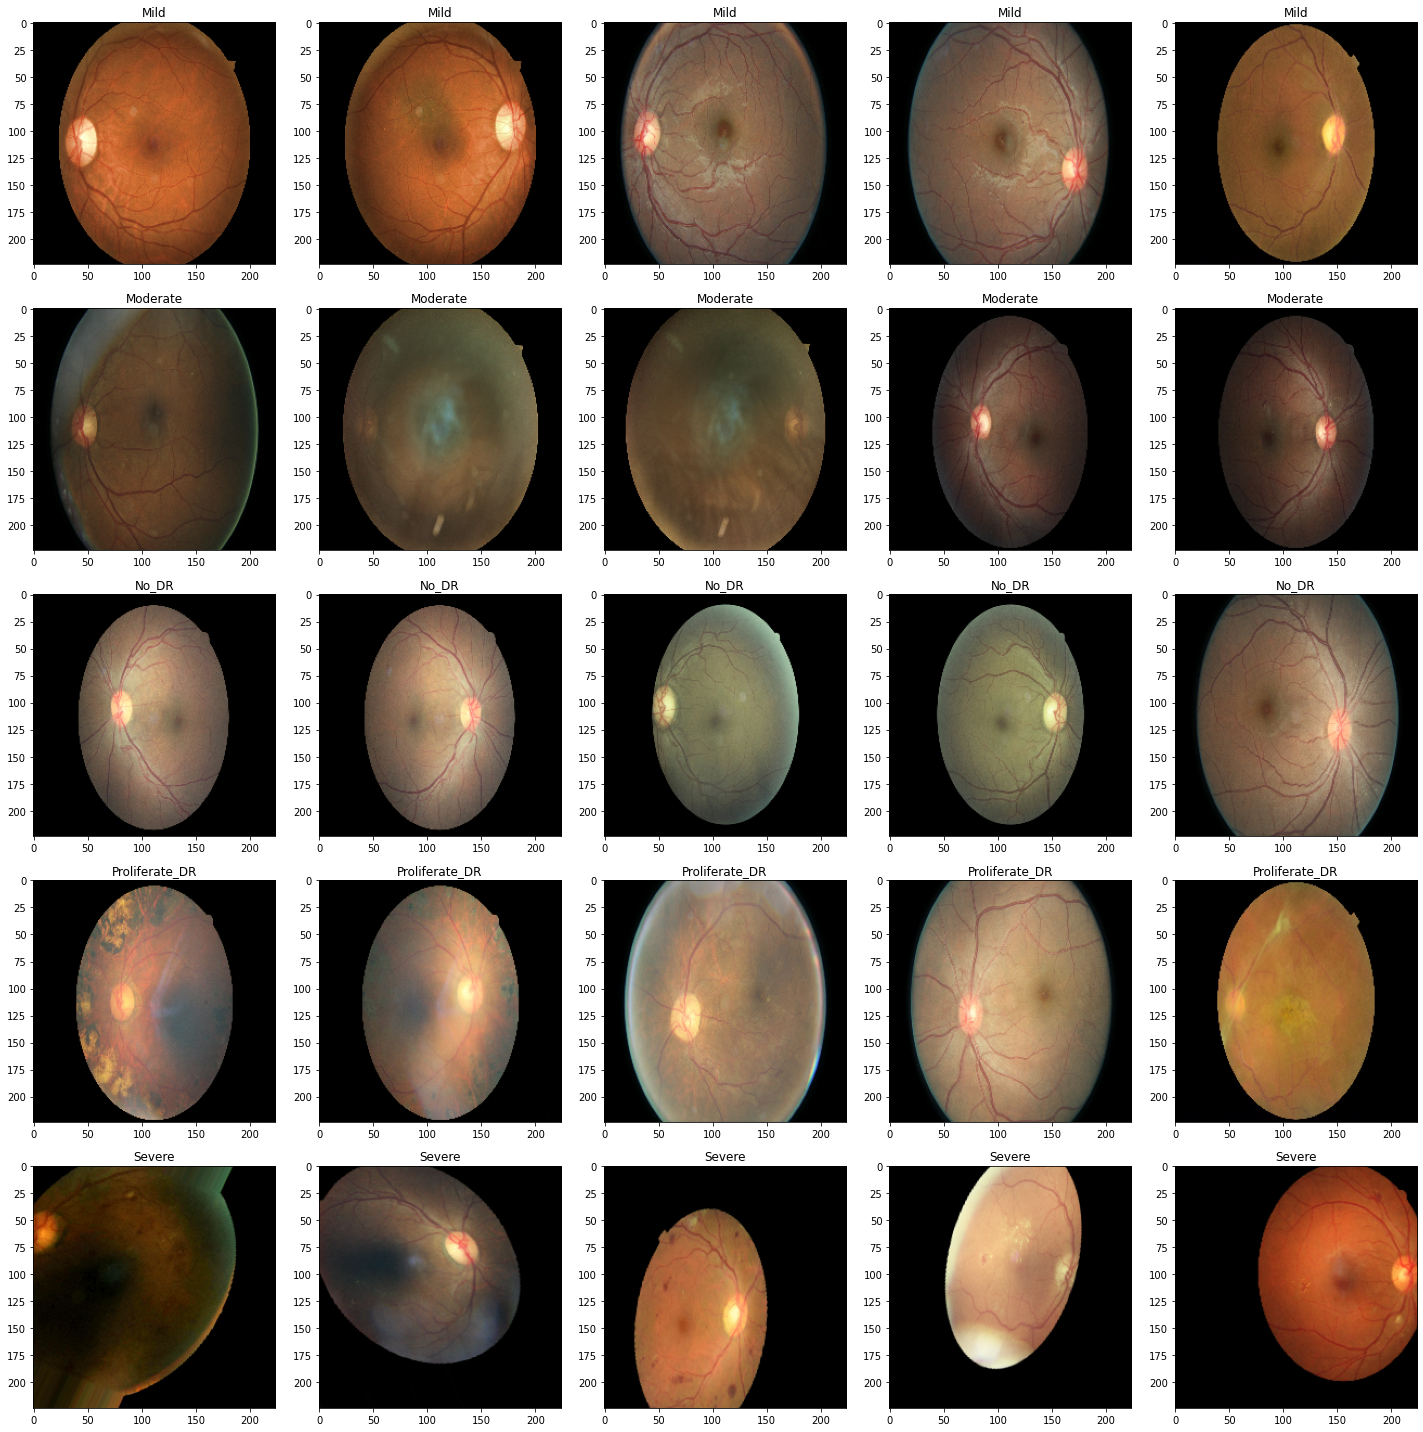

In [4]:
#visualise 5 images of each class

fig, axs = plt.subplots(5,5, figsize=(20,20)) #5 images , 5 class
count = 0

for i in os.listdir(r"dataset"):
    train_class = os.listdir(os.path.join(r"dataset",i))

    for j in range(5):
        img = os.path.join(r"dataset",i,train_class[j])
        img = PIL.Image.open(img)
        axs[count][j].title.set_text(i) #getting class label of that image
        axs[count][j].imshow(img)
    count+=1;
    
fig.tight_layout()

C:\python-3.9.7\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

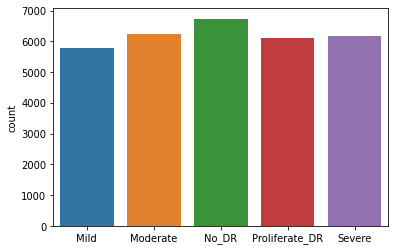

In [6]:
sns.countplot(label)

In [7]:
No_images_per_class = []
Class_name = []

for i in os.listdir(r"dataset"):
    train_class = os.listdir(os.path.join(r"dataset", i))
    No_images_per_class.append(len(train_class))
    Class_name.append(i)
    print('Number of images in {}={}\n'.format(i, len(train_class)))

Number of images in Mild=5785

Number of images in Moderate=6237

Number of images in No_DR=6732

Number of images in Proliferate_DR=6102

Number of images in Severe=6185



In [8]:
retina_df = pd.DataFrame({'Image':train, 'Labels':label})
retina_df

,Image,Labels
0,dataset\Mild\10030_left.png,Mild
1,dataset\Mild\10030_right.png,Mild
2,dataset\Mild\10085_left.png,Mild
3,dataset\Mild\10085_right.png,Mild
4,dataset\Mild\10150_right.png,Mild
...,...,...
31036,dataset\Severe\retina_0_9994.png,Severe
31037,dataset\Severe\retina_0_9996.png,Severe
31038,dataset\Severe\retina_0_9997.png,Severe
31039,dataset\Severe\retina_0_9998.png,Severe


In [9]:
print(len(retina_df))

31041


In [12]:
retina_df = shuffle(retina_df)

In [13]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1):
    ds_size = len(ds)
    ds = shuffle(ds)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    test_size = len(ds) - (train_size + val_size)
    
    train_ds = ds[0: train_size]
    val_ds = ds[train_size : train_size+val_size]
    test_ds = ds[train_size+val_size :]
    return train_ds, val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(retina_df)

In [15]:
type(train_ds)

pandas.core.frame.DataFrame

In [16]:
train_ds.head()

,Image,Labels
10683,dataset\Moderate\7279_right.png,Moderate
8088,dataset\Moderate\27168_left.png,Moderate
20149,dataset\Proliferate_DR\retina_0_2151.png,Proliferate_DR
11090,dataset\Moderate\retina_0_102.png,Moderate
30536,dataset\Severe\retina_0_9221.png,Severe


In [33]:
train_images = train_ds['Image']
train_labels = train_ds['Labels']

In [34]:
test_images = test_ds['Image']
test_labels = test_ds['Labels']

In [35]:
val_images = val_ds['Image']
val_labels = val_ds['Labels']

In [29]:
img_size = 256
b_size = 32
channels = 3
epoch = 10

In [44]:
type(train_image[0])

str

In [60]:
from keras.preprocessing.image import ImageDataGenerator
def path2ImageArray(df):
    data = pd.DataFrame()
    for path in df:
        img = cv2.imread(path)
        img = pd.Series(img)
        data.append(img)
    return data


In [61]:
t1 = path2ImageArray(train_images)

ValueError: Data must be 1-dimensional

In [36]:
#scaling
resize_rescale = tf.keras.Sequential([
    #all the image have the same size then why to use??
    #when user input new image of different size then useful
    layers.experimental.preprocessing.Resizing(img_size, img_size),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [37]:
i_shape = (b_size, img_size, img_size, channels)

model = models.Sequential([
    resize_rescale,
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),  activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(), 
    
    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(5, activation='softmax')
])
model.build(i_shape)

In [38]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_5 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 60, 60, 64)         

In [39]:
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])

In [41]:
history = model.fit(train_images, train_labels, 
          epochs= 1, batch_size = 32,
         verbose=1, validation_data=(val_images, val_labels))

ValueError: in user code:

    File "C:\python-3.9.7\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\python-3.9.7\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\python-3.9.7\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\python-3.9.7\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "C:\python-3.9.7\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer 'resizing_2' (type Resizing).
    
    'images' must have either 3 or 4 dimensions.
    
    Call arguments received by layer 'resizing_2' (type Resizing):
      • inputs=tf.Tensor(shape=(32, 1), dtype=float32)
